In [10]:
import gym
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
env = gym.make('Pong-v0')
obs = env.reset()

[2019-06-06 16:51:13,635] Making new env: Pong-v0


In [9]:
obs.shape

(210, 160, 3)

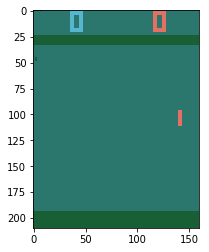

In [22]:
plt.imshow(obs)

In [38]:
obs_new = cv2.resize(obs, (84,110), interpolation=cv2.INTER_AREA)
obs_new = cv2.cvtColor(obs_new, cv2.COLOR_RGB2GRAY)
obs_new = obs_new[110-84-8:110-8, :]

obs_new.shape

(84, 84)

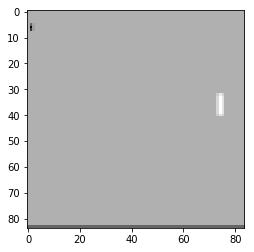

In [39]:
plt.imshow(obs_new, cmap='gray')

In [40]:
class AtariStateProcessing():
    def __init__(self, input_shape=(84,84), frames=4):
        self.state = [np.zeros(input_shape) for _ in range(frames)]
    

    def preprocess(self, obs, play_area_shift=8):
        obs_new = cv2.resize(obs, (84,110), interpolation=cv2.INTER_AREA)
        obs_new = cv2.cvtColor(obs_new, cv2.COLOR_RGB2GRAY)
        obs_processed = obs_new[110-84-play_area_shift:110-play_area_shift, :]

        return obs_processed
    

    def get_state(self, obs):
        obs_processed = self.preprocess(obs)
        self.state.pop(0)
        self.state.append(obs_processed)

        return self.state.copy()